# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

In [57]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [58]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [59]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    
    derivatives = []
    derivatives.append(np.mean(predictions-y_train))
    derivatives.append(np.mean(np.multiply((predictions-y_train), x_train))) 
    
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
       
    parameters['b0'] = parameters['b0'] - learning_rate*derivatives[0]
    parameters['b1'] = parameters['b1'] - learning_rate*derivatives[1]
        
    return parameters

### Build training function

In [60]:
def train(x_train, y_train, learning_rate, iters = 5):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #Prediction
        predictions = get_pred(x_train, parameters)
        
        
        #cost function
        cost = cost_function(predictions, y_train)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #Calc. gradient/derivatives
        derivatives = deriv(x_train, y_train, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Traing model with your function by gradient descent algrithm

Iteration = 1, Loss = 4880.601582261255


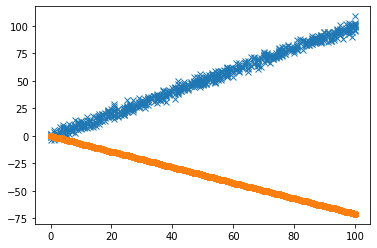

Iteration = 2, Loss = 2167.4333285647763


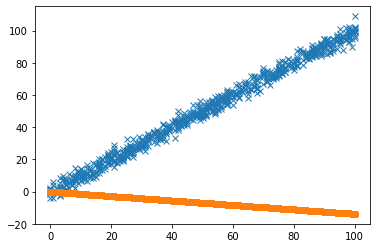

Iteration = 3, Loss = 963.7553769307667


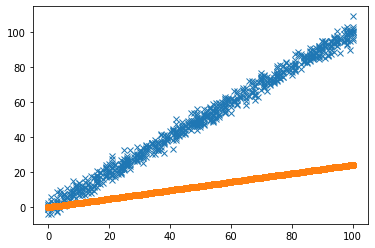

Iteration = 4, Loss = 429.75214683486615


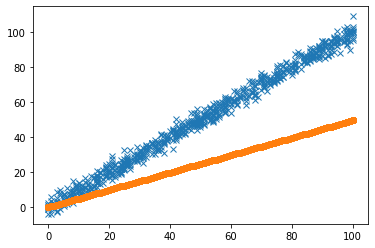

Iteration = 5, Loss = 192.84538172081525


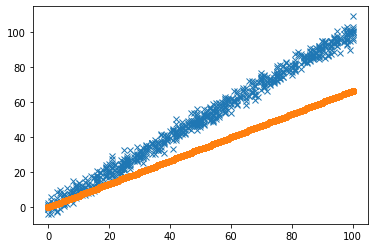

Iteration = 6, Loss = 87.74336698166492


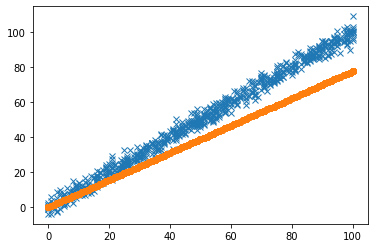

Iteration = 7, Loss = 41.11559973129339


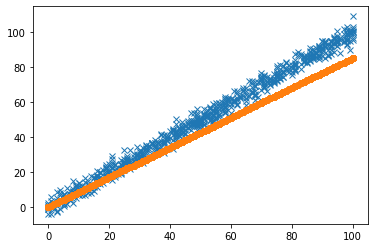

Iteration = 8, Loss = 20.429519784706027


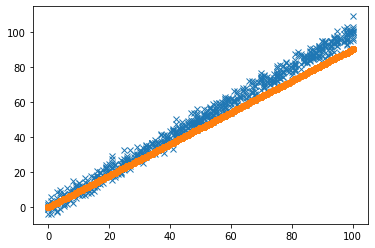

Iteration = 9, Loss = 11.252286365754268


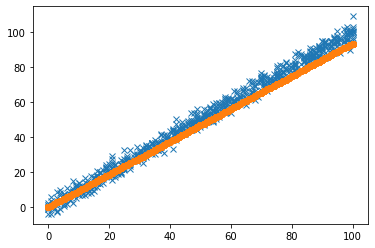

Iteration = 10, Loss = 7.180871502303968


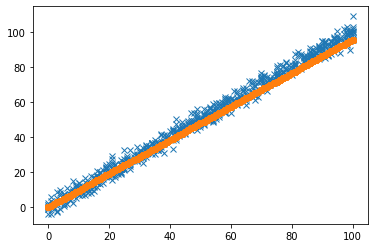

In [63]:
parameters, _ = train(x_train, y_train, 0.0001, iters = 10)

### Print your final fitted model/ validate model on test data set

In [64]:
y_pred = get_pred(x_test, parameters)

In [65]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9833131984014803
14.055857486946918
